In [ ]:
#SUPPORT VECTOR MACHINE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('svm.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
#extract x and y from df
x = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [ ]:
#performing feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
#split into train test
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#import and train SVM
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_tr,y_tr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#predict output and accuracy and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = classifier.predict(X_te)
acc = accuracy_score(y_te,y_pred)
cm = confusion_matrix(y_te,y_pred)
acc

0.9125

In [ ]:
cm

array([[57,  1],
       [ 6, 16]])

<function matplotlib.pyplot.show>

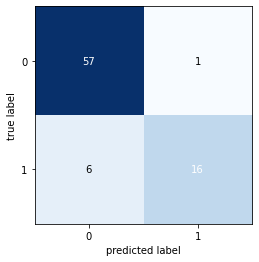

In [ ]:
#plotting confusion matrix
from mlxtend.plotting import plot_confusion_matrix, plot_decision_regions
plot_confusion_matrix(cm)
plt.show

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


<function matplotlib.pyplot.show>

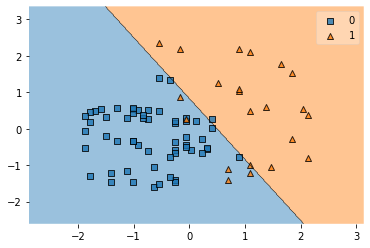

In [ ]:
plot_decision_regions(X=X_te,y=y_te,clf=classifier)
plt.show